# lab3 Statistics
## Generating data

In [1]:
import numpy as np
population_size = 10000
mean = 170
std_dev = 10
population = np.random.normal(loc=mean, scale=std_dev, size=population_size)
# print("Mean:", np.mean(population))
# print("Standard Deviation:", np.std(population))

    

## Task 1: Visualize the population

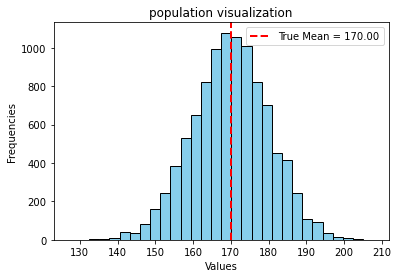

In [2]:
import matplotlib.pyplot as plt
plt.hist(population, bins = 30, color = 'skyblue', edgecolor = 'black')
plt.axvline(x=mean, color='red', linestyle='--', linewidth=2, label='True Mean = 170.00')
plt.xlabel('Values')
plt.ylabel('Frequencies')
plt.title('population visualization')
plt.legend()
plt.show()

## Task 2: Take a Sample and Compute 95% CI 
The equation I used for calculating the $95\%$ confidence interval of $ \hat{\mu} $ is:

$$
\bar{X} \mp t_{\alpha/2;n-1} \cdot \frac{s}{\sqrt{n}}
$$

I used the $t$-distribution as $ \sigma $ is unknown.

In [3]:
from scipy.stats import t
from math import sqrt
from random import sample
students = sample(list(population), 50)
sample_mean = np.mean(students)
sample_std = np.std(students, ddof=1)
alpha = 0.05
dof = 49
t_dist = t.ppf(1 - alpha / 2, df=dof) # as 1 - alpha /2 as in the table we take up to infinity and python take up to the value
lower_bound = sample_mean - t_dist * (sample_std / sqrt(50))
upper_bound = sample_mean + t_dist * (sample_std / sqrt(50))
# print(t_dist)

print("sample standard deviaton ",sample_std)
print("sample mean: ",sample_mean)
print(f"95% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")
 

sample standard deviaton  10.118034628802828
sample mean:  168.20308030180107
95% Confidence Interval: (165.328, 171.079)


## Task 3: Repeat Sampling 100 Times 


In [4]:

import pandas as pd
def CI_calc(data, alpha=0.05):
    
    smean = np.mean(data)
    s_std = np.std(data, ddof=1)
    n = len(data)
    df = n - 1
    t_dist = t.ppf(1 - alpha / 2, df)
    lower = smean - t_dist * (s_std / sqrt(n))
    upper = smean + t_dist * (s_std / sqrt(n))
    return lower ,upper
data_list = []
colors = []
sample_means = []
yerror = []
contain = 0
not_contain = 0
for n in range(100):
    data1 = sample(list(population), 50)
    mu = np.mean(data1)
    sd = np.std(data1, ddof = 1)
    ci = CI_calc(data1)
    if(ci[0] <= mean and ci[1] >= mean):
        contain += 1
        colors.append("green")
    else:
        not_contain += 1
        colors.append("red")
    
    sample_means.append(mu)
    yerror.append([mu - ci[0], ci[1] - mu])    
    data_list.append({
        "lower bound" : round(ci[0],3),
        "Upper bound" : round(ci[1],3),
        "Sample mean" : round(mu,3),
        "Standard deviation" : round(sd,3),
        
    })

df = pd.DataFrame(data_list)
df.to_csv('students.csv', index=False)
print("the number of intervals that contain the true population mean: ",contain)
print("the number of intervals that not contain the true population mean: ",not_contain)
print(df)

the number of intervals that contain the true population mean:  96
the number of intervals that not contain the true population mean:  4
    lower bound  Upper bound  Sample mean  Standard deviation
0       165.270      170.877      168.074               9.864
1       168.518      174.772      171.645              11.004
2       166.282      172.533      169.408              10.997
3       168.447      174.620      171.533              10.860
4       166.650      172.333      169.492               9.998
..          ...          ...          ...                 ...
95      167.884      175.359      171.622              13.151
96      166.068      171.548      168.808               9.641
97      166.812      171.890      169.351               8.934
98      167.454      172.697      170.075               9.225
99      166.377      173.483      169.930              12.501

[100 rows x 4 columns]


## Task 4: Visualize All Confidence Intervals 

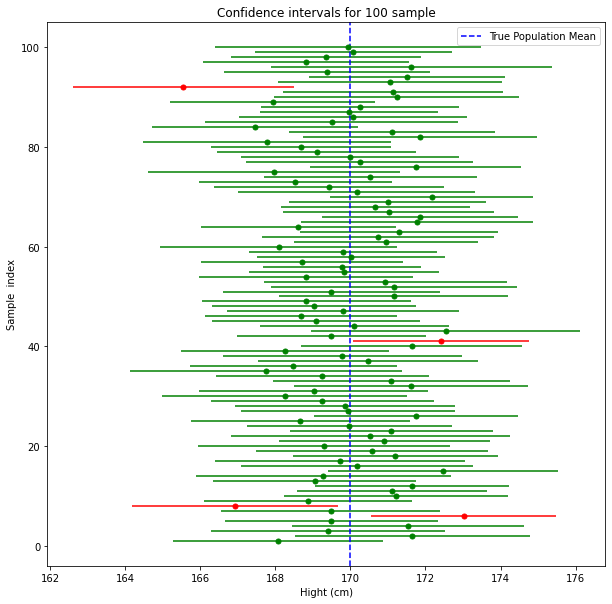

In [5]:
plt.figure(figsize=(10, 10))
for i in range(100):
   plt.errorbar(
        x=sample_means[i], 
        y=i + 1, 
        xerr=[[yerror[i][0]], [yerror[i][1]]],  
        fmt='o', 
        color=colors[i],
        capsize=0, 
        ecolor=colors[i], 
        linestyle='None', 
        markersize=5
    )
plt.axvline(x=mean, color='blue', linestyle='--', label='True Population Mean')
plt.xlabel('Hight (cm)')
plt.ylabel('Sample  index')
plt.title('Confidence intervals for 100 sample')
plt.legend()

plt.show()

## Task 5: Effect of Sample Size 

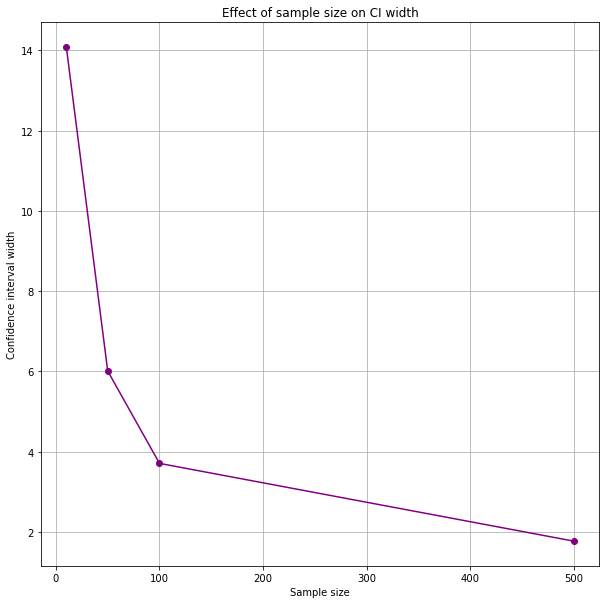

In [6]:
CIs = []
sample_sizes = [10,50,100,500]
for n in sample_sizes:
   x = sample(list(population), n)
   y = CI_calc(x)
   width = y[1] - y[0] 
   CIs.append(width)
plt.figure(figsize=(10,10))
plt.plot(sample_sizes , CIs , marker = 'o', linestyle = '-' , color = 'purple')
plt.xlabel("Sample size")
plt.ylabel("Confidence interval width")
plt.title("Effect of sample size on CI width")
plt.grid(True)
plt.show()

## Questions

## What does the confidence interval represent in this context? 
* It is estimator to that true mean exist in this interval with the percent of the confidence
## Why do some CIs not contain the true mean in Task 3?
* Because the connfidence of the interval is 95% so there is 5% probabilty that the true mean donnot exist in this interval and we note that the number of intervals that donnot cnotain the true mean is about 5% of the number of intervals
## How does sample size affect the confidence interval width?  
What does that imply?
* as the sample size increase the width of the confidence interval decrease because when n increse the term we subtract from sample mean ar add to sample mean decrease(the error),A narrower interval means more precise estimates, which is better for inference.